# Customer churn forecasting

The project task: predict which of the bank's clients are going to cancel the services. The model will be used to prevent customer churn. For the study, historical data on customer behaviour and termination of agreements with the bank is provided.

Data source: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling 

The accuracy metric is too simple and not informative with an imbalance of classes. So I'll use the F1 metric as a key metric (because precision and recall do not depend on the ratio of classes).

To evaluate the quality of the models regardless of the classification threshold, I'll use the AUC-ROC.

Key words
- Python
- Pandas
- Machine learning
- OHE
- Imbalanced classes (upsampling, downsampling)

<h1>Contents<span class="tocSkip"></span></h1>
<li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data preparation</a></span>
    <ul class="toc-item"><li><span><a href="#Data-familarization" data-toc-modified-id="Data-familarization-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data familarization</a></span></li>
        <li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data preprocessing</a></span>
        <ul class="toc-item"><li><span><a href="#Check-for-duplicates" data-toc-modified-id="Check-for-duplicates-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Check for duplicates</a></span></li>
            <li><span><a href="#Encoding-of-qualitative-features" data-toc-modified-id="Encoding-of-qualitative-features-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Encoding of qualitative features</a></span></li>
            <li><span><a href="#Missings-processing" data-toc-modified-id="Missings-processing-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Missings processing</a></span></li></ul></li></ul></li>
            <li><span><a href="#Problem-research" data-toc-modified-id="Problem-research-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Problem research</a></span>
    <ul class="toc-item"><li><span><a href="#Class-balance-research" data-toc-modified-id="Class-balance-research-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Class balance research</a></span></li>
        <li><span><a href="#Training-of-models-without-considering-imbalance" data-toc-modified-id="Training-of-models-without-considering-imbalance-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Training of models without considering imbalance</a></span></li>
        <li><span><a href="#Selection-of-hyperparameters" data-toc-modified-id="Selection-of-hyperparameters-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Selection of hyperparameters</a></span></li></ul></li>
        <li><span><a href="#Fighting-imbalance" data-toc-modified-id="Fighting-imbalance-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fighting imbalance</a></span>
    <ul class="toc-item"><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Upsampling</a></span></li>
        <li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Downsampling</a></span></li></ul></li><li><span><a href="#Model-testing" data-toc-modified-id="Model-testing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model testing</a></span></li>
        <li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusions</a></span></li>

## Data preparation

### Data familarization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score

from sklearn.utils import shuffle 

In [2]:
try:
    df = pd.read_csv('C:\\Users\\Яна\\Documents\\Прогр\\dfs\\Churn.csv')
except Exception:
    print('Data loading error')

df.info()
display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


So, what we have to do:
- Columns 'Row number' and 'Surname' can be deleted, we do not need them;
- Rename the rest, bring to the "snake" style;
- Column with id of clients is useless for forecasting. So it can be deleted after checking for obvious duplicates;
- Provide data by country in integer form;
- There are no gaps in the gender column, so it can be replaced by a column with the corresponding category indices;
- Column with 'Tenure' cast to integer type;
- Also, the 'Tenure' column is the only one that has gaps. We need to look at them and choose a filling method.

### Data preprocessing

#### Check for duplicates

In [3]:
print(df['CustomerId'].value_counts().sum())

10000


Checking by unique numbers - there are no duplicates in the table. We don't need this column anymore, we can delete it.

In [4]:
df = df.drop(['RowNumber', 'Surname', 'CustomerId'], axis = 1)
df = df.rename({'CreditScore': 'credit_score', 'Geography': 'geography', 'Gender': 'gender', 'Age': 'age', 
                'Tenure': 'tenure', 'Balance': 'balance', 'NumOfProducts': 'num_of_products', 
                'HasCrCard': 'has_cr_card', 'IsActiveMember': 'is_active_member', 
                'EstimatedSalary': 'estimated_salary', 'Exited': 'exited'}, axis = 1)

display(df.head())

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Delete extra columns.

Rename the rest.

To create a column with a gender index, I'll write a function for one row.

But to replace the data type in the tenure column, the gaps must be filled first.

#### Encoding of qualitative features

In [5]:
display(df['geography'].unique())

df = pd.get_dummies(df, drop_first = True)
display(df.head())

array(['France', 'Spain', 'Germany'], dtype=object)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Looking at the list of countries - there are only three, it is easy to assign indices. And there are only two genders in the table, and no discussions. Using OHE for encoding.

#### Missings processing

In [6]:
display(df[df['tenure'].isna()].head(20))

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
30,591,39,NaN,0.00,3,1,0,140469.38,1,0,1,0
48,550,38,NaN,103391.38,1,0,1,90878.13,0,1,0,1
51,585,36,NaN,146050.97,2,0,0,86424.57,0,1,0,1
53,655,41,NaN,125561.97,1,0,0,164040.94,1,1,0,1
60,742,35,NaN,136857.00,1,0,0,84509.57,0,1,0,1
82,543,36,NaN,0.00,2,0,0,26019.59,0,0,0,0
85,652,75,NaN,0.00,2,1,1,114675.75,0,0,1,0
94,730,42,NaN,0.00,2,0,1,85982.47,0,0,1,1
99,413,34,NaN,0.00,2,0,0,6534.18,0,0,0,1
111,538,39,NaN,108055.10,2,1,0,27231.26,0,1,0,1


To begin with, I'll look at the passes, suddenly they have some kind of system.

But there is no system, just random gaps in the data. The data is homogeneous, and there are not expected to be any significant outliers in the values, I'll simply fill in the gaps with the average value.

In [7]:
display(df['tenure'].mean())
df['tenure'] = df['tenure'].fillna(5)
df = df.astype({'tenure': int})

4.997690023099769

I look at the average value. The value in the column is indicated in whole years, and the average, of course, is not a whole number. But it can be safely rounded up to five.

Next, I fill in the gaps with the resulting value.

And now nothing prevents to bring the column to an integer format.

## Problem research

### Class balance research

In [8]:
display(df['exited'].sum())

2037

We say that classes are balanced when the number of objects in them is approximately equal, or differs slightly. Let's check.

Two thousand departed customers out of ten thousand in the dataset. 20%. The classes are obviously not balanced.

### Training of models without considering imbalance

In [9]:
df_learn, df_test = train_test_split(df, test_size=0.20, random_state=12345)
df_train, df_valid = train_test_split(df_learn, test_size=0.25, random_state=12345)

features_train = df_train.drop(['exited'], axis = 1)
target_train = df_train['exited']

features_valid = df_valid.drop(['exited'], axis = 1)
target_valid = df_valid['exited']

features_test = df_test.drop(['exited'], axis = 1)
target_test = df_test['exited']

print(features_train.shape)
print(target_train.shape)
print()
print(features_valid.shape)
print(target_valid.shape)
print()
print(features_test.shape)
print(target_test.shape)

(6000, 11)
(6000,)

(2000, 11)
(2000,)

(2000, 11)
(2000,)


Ten thousand is a fairly solid sample, so that we can afford to split it into three - training, validation and test. I split according to the standard proportion 60/20/20.

In [10]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
pd.options.mode.chained_assignment = None

display(features_train.head())

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
492,-0.134048,-0.078068,-0.369113,0.076163,0.816929,0,1,0.331571,0,0,0
6655,-1.010798,0.494555,-0.007415,0.136391,-0.896909,1,1,-0.727858,0,0,1
4287,0.639554,1.353490,-1.454209,0.358435,-0.896909,1,1,-0.477006,1,0,1
42,-0.990168,2.116987,-1.092511,0.651725,-0.896909,1,1,-0.100232,0,0,0
8178,0.567351,0.685430,0.715982,0.813110,0.816929,1,1,0.801922,0,0,0


Using StandardScaler to scale the features. Scaling only features, not targets.

### Selection of hyperparameters

In [11]:
best_result = 0
best_depth = 0
    
for depth in range(1, 6):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    result = accuracy_score(target_valid, predictions)
        
    if result > best_result:
        best_result = result
        best_depth = depth

print("Best accuracy:", best_result)
print("Best depth:", best_depth)

Best accuracy: 0.8545
Best depth: 5


Let's start with the decision tree. Here I will experiment only with depth. I will limit the maximum to five in order to prevent retraining of the model.

In [12]:
best_result = 0
best_depth = 0
best_n_est = 0

for depth in range(1, 6):
    for n_est in range (30, 101, 10):
        model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators = n_est)
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        result = accuracy_score(target_valid, predictions)
        
        if result > best_result:
            best_result = result
            best_depth = depth
            best_n_est = n_est

print("Best accuracy:", best_result)
print("Best depth:", best_depth)
print("Best number of estimators:", best_n_est)

Best accuracy: 0.859
Best depth: 5
Best number of estimators: 70


For the selection of forest hyperparameters, I use a nested loop.

The optimal parameters are: 30 trees, 5 levels each.

Regression. As far as I understand, it does not have hyperparameters that would be worth brute force, so I'll try to train it with the class_weight argument.

I'll train three different models - DTC, RFC, LR. Now I have an optimal hyperparameters for them. 

But first, I ran them without hyperparameter fitting. In order not to duplicate the code, I saved the first set of metrics in the next cell.

Metrics of models not considering the imbalance before the selection of hyperparameters

Accuracy
- Decision Tree: 0.792
- Random Forest: 0.854
- Linear Regression: 0.8145


F1
- Decision Tree: 0.48387096774193544
- Random Forest: 0.5197368421052632
- Linear Regression: 0.30131826741996237



AUC-ROC
- Decision Tree: 0.6809951694353532
- Random Forest: 0.8062918144262055
- Linear Regression: 0.7703391568208876

We can see that the forest is the best on this stage. The regression is in second place in terms of accuracy, but fails F1 score. Decision tree lags behind in all respects.

F1 near tree and forest is about 0.5 - it's about the level of guessing. But the regression predicts class 1 with an accuracy of only 30% - which means that a rather high accuracy is due to a good prediction of class 0. Considering that 80% of the sample is zeros, that is not the result we need.

The AUC-ROC of the forest looks impressive, and the regression is not far behind. But I suspect that this was not without the influence of imbalance.

In [13]:
model_tree = DecisionTreeClassifier(max_depth = 5, random_state = 12345)
model_tree.fit(features_train, target_train)
predictions_tree = model_tree.predict(features_valid)
tree_prob_one_valid = model_tree.predict_proba(features_valid)[:, 1]

And now I'm training models with hyperparameters.

I also calculate here the probability of class 1 for each model in order to further calculate the AUC-ROC.

In [14]:
model_forest = RandomForestClassifier(max_depth = 5, n_estimators = 30, random_state = 12345)
model_forest.fit(features_train, target_train)
predictions_forest = model_forest.predict(features_valid)
forest_prob_one_valid = model_forest.predict_proba(features_valid)[:, 1]

In [15]:
model_lr = LogisticRegression(class_weight = 'balanced', solver = 'liblinear', random_state = 12345)
model_lr.fit(features_train, target_train)
predictions_lr = model_lr.predict(features_valid)
lr_prob_one_valid = model_lr.predict_proba(features_valid)[:, 1]

In [16]:
print('Metrics of models not considering the imbalance after the selection of hyperparameters')
print('Accuracy')
print('Decision Tree:', accuracy_score(target_valid, predictions_tree))
print('Random Forest:', accuracy_score(target_valid, predictions_forest))
print('Linear Regression:', accuracy_score(target_valid, predictions_lr))
print()
print('F1')
print('Decision Tree:', f1_score(target_valid, predictions_tree))
print('Random Forest:', f1_score(target_valid, predictions_forest))
print('Linear Regression:', f1_score(target_valid, predictions_lr))
print()
print('AUC-ROC')
print('Decision Tree:', roc_auc_score(target_valid, tree_prob_one_valid))
print('Random Forest:', roc_auc_score(target_valid, forest_prob_one_valid))
print('Linear Regression:', roc_auc_score(target_valid, lr_prob_one_valid))

Metrics of models not considering the imbalance after the selection of hyperparameters
Accuracy
Decision Tree: 0.8545
Random Forest: 0.857
Linear Regression: 0.705

F1
Decision Tree: 0.5488372093023256
Random Forest: 0.4723247232472325
Linear Regression: 0.4741532976827095

AUC-ROC
Decision Tree: 0.8224509194603883
Random Forest: 0.8359483658894422
Linear Regression: 0.7725660805030526


After optimizing the hyperparameters, the metrics changed noticeably. The accuracy of the regression has slightly decreased, but F1 has grown, overtaking even a random forest. Perhaps now we cannot call the forest model the undisputed leader, it is not yet clear between the forest and the tree which is better. The regression is still lagging, but not as much.

## Fighting imbalance

I will take two approaches - upsampling and downsampling.

### Upsampling

In [17]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_train_up, target_train_up = upsample(features_train, target_train, 4)

In [18]:
best_result = 0
best_depth = 0

for depth in range(1, 6):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train_up, target_train_up)
    tree_up_predict = model.predict(features_valid)
    result = accuracy_score(target_valid, tree_up_predict)
        
    if result > best_result:
        best_result = result
        best_depth = depth

print("Best accuracy:", best_result)
print("Best depth:", best_depth)

Best accuracy: 0.7625
Best depth: 5


In [19]:
best_result = 0
best_depth = 0
best_n_est = 0

for depth in range(1, 6):
    for n_est in range (30, 101, 10):
        model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators = n_est)
        model.fit(features_train_up, target_train_up)
        forest_up_predict = model.predict(features_valid)
        result = accuracy_score(target_valid, forest_up_predict)
        
        if result > best_result:
            best_result = result
            best_depth = depth
            best_n_est = n_est

print("Best accuracy:", best_result)
print("Best depth:", best_depth)
print("Best number of estimators:", best_n_est)

Best accuracy: 0.7805
Best depth: 5
Best number of estimators: 30


I reselect hyperparameters considering the changed conditions.

Nothing has changed, the hyperparameters remain the same. Then I create and train models.

In [20]:
model_tree_up = DecisionTreeClassifier(max_depth = 5, random_state = 12345)
model_tree_up.fit(features_train_up, target_train_up)
predictions_tree_up = model_tree_up.predict(features_valid)

model_forest_up = RandomForestClassifier(max_depth = 5, n_estimators = 30, random_state = 12345)
model_forest_up.fit(features_train_up, target_train_up)
predictions_forest_up = model_forest_up.predict(features_valid)

model_lr_up = LogisticRegression(random_state = 12345, solver = 'liblinear')
model_lr_up.fit(features_train_up, target_train_up)
predictions_lr_up = model_lr_up.predict(features_valid)

In [21]:
print('Accuracy after upsampling:')
print('DTC', accuracy_score(target_valid, predictions_tree_up))
print('RFC', accuracy_score(target_valid, predictions_forest_up))
print('LR', accuracy_score(target_valid, predictions_lr_up))
print()
print('F1 after upsampling:')
print('DTC:', f1_score(target_valid, predictions_tree_up))
print('RFC:', f1_score(target_valid, predictions_forest_up))
print('LR:', f1_score(target_valid, predictions_lr_up))

Accuracy after upsampling:
DTC 0.7625
RFC 0.7805
LR 0.703

F1 after upsampling:
DTC: 0.5489078822412156
RFC: 0.5587939698492462
LR: 0.4771126760563381


Now I recheck the accuracy and F1.

The regression metrics were almost unchanged. The DTC and RFC lost in accuracy, but RFC at the same time significantly increased F1. On a sample balanced by upsampling, the random forest seems to be the most successful model.

### Downsampling

In [22]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_train_down, target_train_down = downsample(features_train, target_train, 0.25)

Now let's try to throw away the excess of zeros. In order for the classes to become equal, we need to remove 3/4 of zeros. The soul of the researcher hurts when 60% of the sample goes to the trash can, but the salary will hurt from getting bad predictions. So we cut.

In [23]:
best_result = 0
best_depth = 0

for depth in range(1, 6):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train_down, target_train_down)
    tree_down_predict = model.predict(features_valid)
    result = accuracy_score(target_valid, tree_down_predict)
        
    if result > best_result:
        best_result = result
        best_depth = depth

print("Best accuracy:", best_result)
print("Best depth:", best_depth)

Best accuracy: 0.7835
Best depth: 3


In [24]:
best_result = 0
best_depth = 0
best_n_est = 0

for depth in range(1, 6):
    for n_est in range (30, 101, 10):
        model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators = n_est)
        model.fit(features_train_down, target_train_down)
        forest_down_predict = model.predict(features_valid)
        result = accuracy_score(target_valid, forest_down_predict)
        
        if result > best_result:
            best_result = result
            best_depth = depth
            best_n_est = n_est

print("Best accuracy:", best_result)
print("Best depth:", best_depth)
print("Best number of estimators:", best_n_est)

Best accuracy: 0.776
Best depth: 4
Best number of estimators: 100


But after downsampling, the optimal parameters have changed. Training models with new hyperparameters.

In [25]:
model_tree_down = DecisionTreeClassifier(max_depth = 3, random_state = 12345)
model_tree_down.fit(features_train_down, target_train_down)
predictions_tree_down = model_tree_down.predict(features_valid)

model_forest_down = RandomForestClassifier(max_depth = 4, n_estimators = 100, random_state = 12345)
model_forest_down.fit(features_train_down, target_train_down)
predictions_forest_down = model_forest_down.predict(features_valid)

model_lr_down = LogisticRegression(random_state = 12345, solver = 'liblinear')
model_lr_down.fit(features_train_down, target_train_down)
predictions_lr_down = model_lr_down.predict(features_valid)

In [26]:
print('Accuracy after downsampling:')
print('DTC', accuracy_score(target_valid, predictions_tree_down))
print('RFC', accuracy_score(target_valid, predictions_forest_down))
print('LR', accuracy_score(target_valid, predictions_lr_down))
print()
print('F1 after downsampling:')
print('DTC:', f1_score(target_valid, predictions_tree_down))
print('RFC:', f1_score(target_valid, predictions_forest_down))
print('LR:', f1_score(target_valid, predictions_lr_down))

Accuracy after downsampling:
DTC 0.7835
RFC 0.776
LR 0.7015

F1 after downsampling:
DTC: 0.5118376550169109
RFC: 0.554671968190855
LR: 0.47493403693931396


The values have changed somewhat, but fluctuate at about the same level. The metrics of the tree and the forest have decreased by 1-3%, the regression kept its level. 

I'll start testing with a random forest model trained on an upsampled sample as having the best metrics.

## Model testing

In [27]:
test_predictions = model_forest_up.predict(features_test)
test_1_prob = model_forest_up.predict_proba(features_test)[:, 1]

print('Accuracy:', accuracy_score(target_test, test_predictions))
print('F1:', f1_score(target_test, test_predictions))
print('AUC-ROC:', roc_auc_score(target_test, test_1_prob))

Accuracy: 0.7955
F1: 0.6123222748815166
AUC-ROC: 0.8555795917941968


Not bad at all!

In [28]:
print(pd.Series(target_test).value_counts())
print()
print(pd.Series(test_predictions).value_counts())

0    1573
1     427
Name: exited, dtype: int64

0    1372
1     628
dtype: int64


Out of interest, I'll look at the proportions of the classes. There are more ones in the predictions than in the target sample, the model is clearly prone to false positive answers. This probably explains the low F1 score.

Final model:
Accuracy: 0.7955
AUC-ROC: 0.8555795917941968

Constant model:
Accuracy: 0.7865
AUC-ROC: 0.5


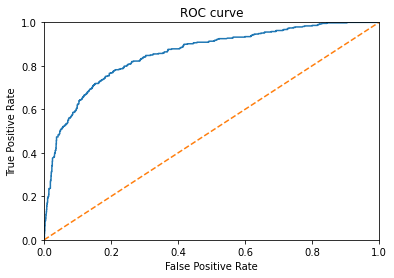

In [29]:
const_predict = pd.Series(0, index = target_test.index)

print('Final model:')
print('Accuracy:', accuracy_score(target_test, test_predictions))
print('AUC-ROC:', roc_auc_score(target_test, test_1_prob))
print()
print('Constant model:')
print('Accuracy:', accuracy_score(target_test, const_predict))
print('AUC-ROC:', roc_auc_score(target_test, const_predict))

fpr, tpr, thresholds = roc_curve(target_test, model_forest_up.predict_proba(features_test)[:, 1]) 

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

Now I will check the model for adequacy. I create a constant model, and check accuracy and AUC-ROC for both models.

Interesting. With a significant difference in AUC-ROC, the final model is only 1% more accurate than the random one. However, more precisely, so that the model can be considered adequate. The shape of the ROC curve confirms this.

## Conclusions

Based on the predictions of this model, the bank will make about a third more customers happy with super-offers than it was going to leave. However, given the dynamics, they should focus not on targeted work with the leaving clients, but on improving conditions for clients in general.